# 경제지표 분석 및 feature 생성  --- 아직 수정중입니다! 

# 사용할 수 있는 feature 목록
- 1. 개인신용카드사용액
- 2. 소매판매액지수
- 3. NS 홈쇼핑 분기 매출액 (ref.분기보고서)
- 4. 경기동행지수순환변동치


In [47]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

    
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 

import warnings

warnings.filterwarnings(action = 'ignore') 


try:
    if platform.system()=="Windows":
        font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.ttf").get_name()
        rc("font",family=font_name)
    else:
        rc('font',family='AppleGothic')
except:
    pass

matplotlib.rcParams['axes.unicode_minus']=False

sales = pd.read_excel('sales.xlsx', header=1)
sales.head()

# 무형 지우기
sales.drop(sales[sales["상품군"]=="무형"].index, inplace=True)

# 판매단가 > 취급액 이면 취급액 = 0 

def custom(price, total):
    if price > total:
        return 0
    
    else:
        return total

sales["취급액"] = sales.apply(lambda x : custom(x["판매단가"], x["취급액"]), axis=1)

# 확인
print(sum((sales["판매단가"] > sales["취급액"]) & (sales['취급액'] != 0)))
sales

0


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0
38301,2020-01-01 00:00:00,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0
38302,2020-01-01 00:00:00,NaN,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0


In [48]:
# month, day, hour, minute, weekday 열 추가
sales['month'] = pd.DatetimeIndex(sales['방송일시']).month
sales['day'] = pd.DatetimeIndex(sales['방송일시']).day
sales['hour'] = pd.DatetimeIndex(sales['방송일시']).hour
sales['minute'] = pd.DatetimeIndex(sales['방송일시']).minute
sales['weekday'] = pd.DatetimeIndex(sales['방송일시']).weekday
sales['방송날짜'] = pd.DatetimeIndex(sales['방송일시']).date

sales

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송날짜
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,2019-01-01
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,2019-01-01
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,2019-01-01
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,2019-01-01
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,12,31,23,40,1,2019-12-31
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,1,1,0,0,2,2020-01-01
38301,2020-01-01 00:00:00,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,1,1,0,0,2,2020-01-01
38302,2020-01-01 00:00:00,NaN,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,1,1,0,0,2,2020-01-01



# 1. 개인 신용카드사용액 (단위:백만원) 
- 월별 매출액(sum) 상관관계 분석 -> 0.8 이상
- 문제 : 2020년 6월 데이터가 08.17 현재까지 안올라오고 있음... 

In [66]:
# 2019.01 - 12 월별 신용카드 금액

credit = np.array([52039328,45466358,51678679,50723386,53425506,50508891,53730267,52485647,50893769,54017093,53814165, 55909956])
credit = (credit-credit.min()) / (credit.max() - credit.min())

df_credit = pd.DataFrame(credit, columns=['신용카드금액'],index=['1','2','3','4','5','6','7','8','9','10','11','12'])
df_credit


,신용카드금액
1,0.629378
2,0.000000
3,0.594845
4,0.503373
5,0.762108
6,0.482835
7,0.791289
8,0.672114
9,0.519688
10,0.818754


### 개인신용카드사용액과 매출액 상관관계 분석 -> 약 0.8

In [56]:
corr_2 = np.corrcoef(df_credit['신용카드금액'],month_sales)
corr_2

array([[1.        , 0.84237233],
       [0.84237233, 1.        ]])

In [82]:
# 그래프로 그려보기 

# fig, ax = plt.subplots(figsize=(15,7))

# ax.scatter(df_credit['신용카드금액'], month_sales) # 할부 

# plt.xlabel('신용카드금액')
# plt.ylabel('매출액')

# plt.show()

In [83]:
# normalize해서 scale이 다른 두 지표의 시간대별 추이 비교하기 

# month_sales = sales.groupby('month').sum()['취급액'].reset_index()['취급액']

# month_sales = (month_sales - month_sales.min()) / (month_sales.max() - month_sales.min())

# # 그래프 그리기 
# fig, ax = plt.subplots(figsize=(13,7))

# ax.plot(df_credit.index, df_credit['신용카드금액'], label='creit card') # 할부 
# ax.plot(month_sales.index, month_sales, label='month sales')

# plt.xlabel('month')
# plt.ylabel('금액/매출액')
# plt.legend(loc='upper left')

# plt.show()

### sales에 개인신용카드사용액 feature 합치기 

In [71]:
dfcredit= {'month':[1,2,3,4,5,6,7,8,9,10,11,12],
    'ec_credit' :[52039328,45466358,51678679,50723386,53425506,50508891,53730267,52485647,50893769,54017093,53814165, 55909956]}

ec_credit = pd.DataFrame(dfcredit)

sales = pd.merge(sales, ec_credit)
sales.head()

# 확인해보기
# sales[sales['month']==10]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송날짜,qaurter,ec_credit
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,2019-01-01,117699,52039328
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,2019-01-01,117699,52039328
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,2019-01-01,117699,52039328
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,2019-01-01,117699,52039328
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,2019-01-01,117699,52039328


# 2. 소매판매액지수(경기 동행지표)
- 소비 동향을 파악하기 위해 작성되는 지표. 백화점, 대형마트, 편의점 등 소매판매점의 매월 판매금액을 조사하여 작성하는 통계.

In [73]:
# 소매판매액지수 df 만들기 

retail_index = np.array([109.8,99.8,116.0,111.4,116.6,110.0,110.5,111.4,113.3,115.8,120.5,121.6])

df_retail = pd.DataFrame(retail_index, columns=['소매판매액지수'],index=['1','2','3','4','5','6','7','8','9','10','11','12'])

# 월별 매출액 
month_sales = sales.groupby('month').sum()['취급액'].reset_index()['취급액']

df_retail

,소매판매액지수
1,109.8
2,99.8
3,116.0
4,111.4
5,116.6
6,110.0
7,110.5
8,111.4
9,113.3
10,115.8


In [75]:
corr_4 = np.corrcoef(df_retail['소매판매액지수'],month_sales)
corr_4

array([[1.        , 0.77036093],
       [0.77036093, 1.        ]])

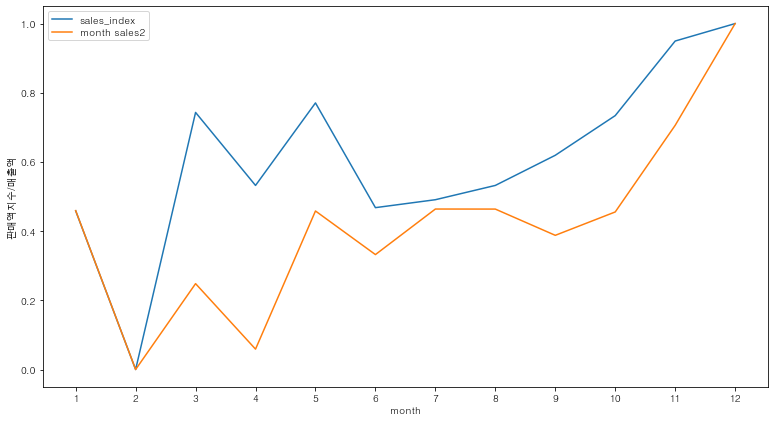

In [34]:
# normalize해서 scale이 다른 두 지표의 추이 비교하기 

month_sales2 = (month_sales - month_sales.min()) / (month_sales.max() - month_sales.min())
retail_index2 = pd.DataFrame((retail_index - retail_index.min()) / (retail_index.max() -retail_index.min()))

# 그래프 그리기 
fig, ax = plt.subplots(figsize=(13,7))

ax.plot(dfsal_index.index, dfsal_index['소매판매액지수'], label='sales_index') # 할부 
ax.plot(month_sales2.index, month_sales2, label='month sales2')

plt.xlabel('month')
plt.ylabel('판매액지수/매출액')
plt.legend(loc='upper left')

plt.show()

# sales에 소매판매액지수 feature 합치기


In [77]:
dfretail= {'month':[1,2,3,4,5,6,7,8,9,10,11,12],
    'ec_retail' :[109.8,99.8,116.0,111.4,116.6,110.0,110.5,111.4,113.3,115.8,120.5,121.6]}

ec_retail = pd.DataFrame(dfretail)

sales = pd.merge(sales, ec_retail)
sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송날짜,qaurter,ec_credit,ec_retail
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,2019-01-01,117699,52039328,109.8
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,2019-01-01,117699,52039328,109.8
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,2019-01-01,117699,52039328,109.8
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,2019-01-01,117699,52039328,109.8
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,2019-01-01,117699,52039328,109.8


# Test data에 사용할 경우 필요한 데이터
- 1) 소매판매액지수(2020.06) : 116.9



# 경제심리지수 -> 사용X 
-  기업과 소비자를 모두를 포함한 민간의 경제상황에 대한 심리를 종합적으로 파악하기 위해 기업경기실사지수(BSI)와 소비자동향지수(CSI)를 합성한 지표
- 100을 넘으면 민간의 경제심리가 과거보다 좋다는 의미이고, 100을 밑돌면 과거 평균보다 못하다는 뜻이다.


In [59]:
# 경제심리지수 df 만들기 

ESI = np.array([89.8,95.6,94.7,95.8,92.1,92.8,89.6,88.8,91.7,91.1,91.9,92.9])



# esi_index = (ESI - ESI.min()) / (ESI.max() - ESI.min())

dfESI = pd.DataFrame(ESI, columns=['경제심리지수'],index=['1','2','3','4','5','6','7','8','9','10','11','12'])


# 월별 매출액 
month_sales = sales.groupby('month').sum()['취급액'].reset_index()['취급액']

In [60]:
corr_5 = np.corrcoef(dfESI['경제심리지수'], month_sales)
corr_5

array([[ 1.        , -0.49266891],
       [-0.49266891,  1.        ]])

# 3. NS홈쇼핑 분기매출액 (단위 백만원)
### + sales 원본 테이블에 합치기 

In [45]:
# NS홈쇼핑 분기매출액 (단위 백만원)
# 2019 1분기, 2분기, 3분기, 4분기

quarter = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],
           'qaurter' : [117699,117699,117699,124570,124570,124570,124049,124049,124049,131669,131669,131669]}

columns = ['month', 'qaurter_sales'] 
quarter_sales = pd.DataFrame(quarter)

# 1,2,3월에 117699 
# 4,5,6월에 124570 
# 7,8,9월에 124049
# 10,11,12월에 131669 집어넣기 

quarter_sales

,month,qaurter
0,1,117699
1,2,117699
2,3,117699
3,4,124570
4,5,124570
5,6,124570
6,7,124049
7,8,124049
8,9,124049
9,10,131669


In [84]:
# sales에 merge하기 

sales = pd.merge(sales,quarter_sales)
sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송날짜,qaurter,ec_credit,ec_retail
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,2019-01-01,117699,52039328,109.8
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,2019-01-01,117699,52039328,109.8
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,2019-01-01,117699,52039328,109.8
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,2019-01-01,117699,52039328,109.8
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,2019-01-01,117699,52039328,109.8



## Test data에 활용해야 할 데이터	

### * 2020 2분기 (4-6월)
- 133,504

# 4. 경기동행지수순환변동치  
- 상관계수 : 0.69076

In [97]:
# 연습장으로 활용 

a = np.array([100.2,99.8,99.7,99.7,99.9,99.9,99.8,99.9,100.0,100.0,99.9,100.2])

df_a = pd.DataFrame(a, columns=['경기동행지수순환변동치'],index=['1','2','3','4','5','6','7','8','9','10','11','12'])

# 월별 매출액 
month_sales = sales.groupby('month').sum()['취급액'].reset_index()['취급액']

df_a

,경기동행지수순환변동치
1,100.2
2,99.8
3,99.7
4,99.7
5,99.9
6,99.9
7,99.8
8,99.9
9,100.0
10,100.0


In [98]:
corr_5 = np.corrcoef(df_a['경기동행지수순환변동치'],month_sales)
corr_5

array([[1.        , 0.69076662],
       [0.69076662, 1.        ]])

# sales에 feature 합치기

In [101]:

cyclical= {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],
           'ec_cyclical' : [100.2,99.8,99.7,99.7,99.9,99.9,99.8,99.9,100.0,100.0,99.9,100.2]}

cyclical = pd.DataFrame(cyclical)

# 1,2,3월에 117699 
# 4,5,6월에 124570 
# 7,8,9월에 124049
# 10,11,12월에 131669 집어넣기 

cyclical

,month,ec_cyclical
0,1,100.2
1,2,99.8
2,3,99.7
3,4,99.7
4,5,99.9
5,6,99.9
6,7,99.8
7,8,99.9
8,9,100.0
9,10,100.0


In [102]:
sales = pd.merge(sales,cyclical)
sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,month,day,hour,minute,weekday,방송날짜,qaurter,ec_credit,ec_retail,ec_cyclical
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,6,0,1,2019-01-01,117699,52039328,109.8,100.2
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,6,0,1,2019-01-01,117699,52039328,109.8,100.2
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,6,20,1,2019-01-01,117699,52039328,109.8,100.2
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,6,20,1,2019-01-01,117699,52039328,109.8,100.2
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,6,40,1,2019-01-01,117699,52039328,109.8,100.2


In [ ]:

# # 연습장으로 활용 

# a = np.array([])

# df_a = pd.DataFrame(a, columns=['dd'],index=['1','2','3','4','5','6','7','8','9','10','11','12'])

# # 월별 매출액 
# month_sales = sales.groupby('month').sum()['취급액'].reset_index()['취급액']

# df_a


# 확인했지만 사용하지 못하는 경제 지표들 

## - 생활물가지수, 생산자물가지수, 소비자물가지수, 소비자 심리지수, 취업자수, 경제심리지수


- 월별 매출액(sum)과 상관관계 분석했지만 0.5 미만 -> 사용 X
